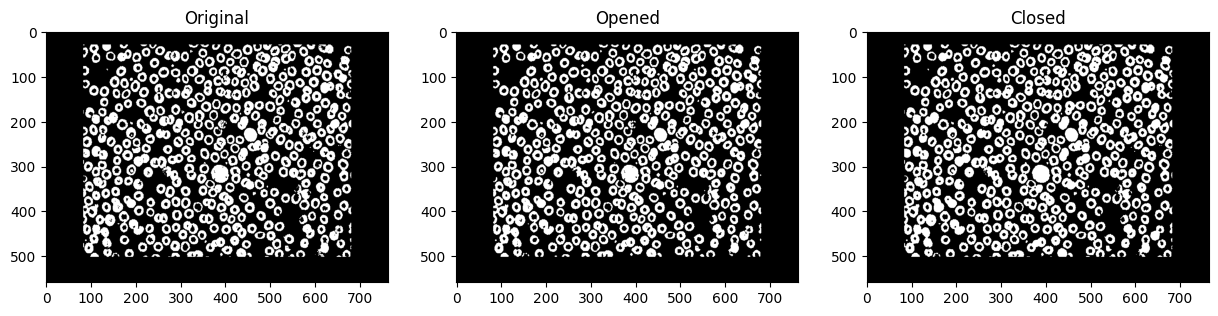

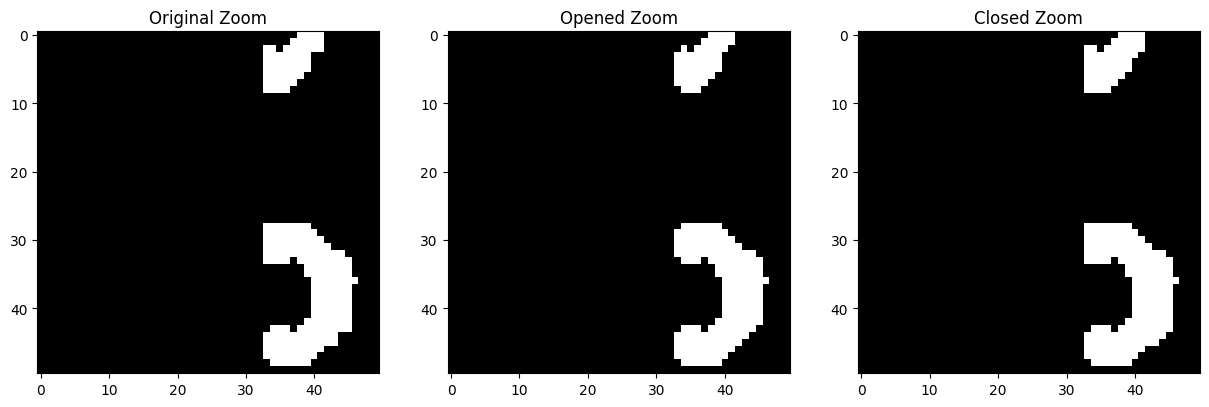

In [2]:
import matplotlib.pyplot as plt
from skimage import io, morphology
from skimage.measure import label

image = io.imread('../TestImages/Week 7/cells_binary_inv.png', as_gray=True)
binary = image > 0.5  

selem = morphology.disk(1)

opened = morphology.opening(binary, selem)
closed = morphology.closing(binary, selem)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(binary, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(opened, cmap='gray')
axes[1].set_title('Opened')
axes[2].imshow(closed, cmap='gray')
axes[2].set_title('Closed')

y, x, h, w = 50, 50, 50, 50
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(binary[y:y+h, x:x+w], cmap='gray')
axes[0].set_title('Original Zoom')
axes[1].imshow(opened[y:y+h, x:x+w], cmap='gray')
axes[1].set_title('Opened Zoom')
axes[2].imshow(closed[y:y+h, x:x+w], cmap='gray')
axes[2].set_title('Closed Zoom')
plt.show()

Opened labels: 369
Closed labels: 343


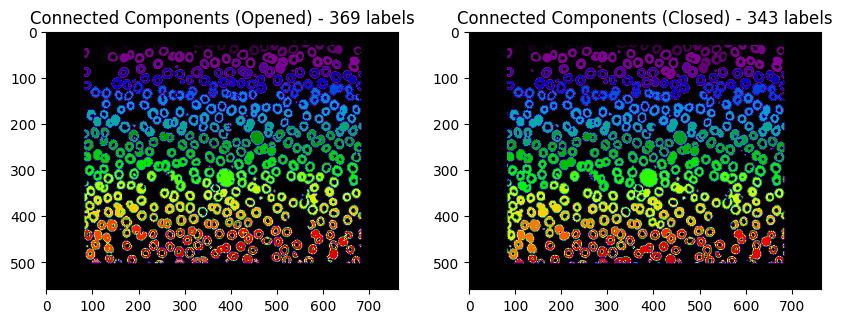

In [3]:
# 4.1.3 
# Label connected components
labels_open = label(opened, connectivity=2)
labels_close = label(closed, connectivity=2)

print(f"Opened labels: {labels_open.max()}") # num_opened
print(f"Closed labels: {labels_close.max()}") # num_closed

# Visualize labels
plt.figure(figsize=(10,5))
plt.subplot(121).imshow(labels_open, cmap='nipy_spectral')
plt.title(f'Connected Components (Opened) - {labels_open.max()} labels')
plt.subplot(122).imshow(labels_close, cmap='nipy_spectral')
plt.title(f'Connected Components (Closed) - {labels_close.max()} labels')
plt.show()


In [1]:
from skimage import io, morphology, measure

money = io.imread('../TestImages/Week 7/money_bin.png', as_gray=True) > 0.5

# Clean image
selem = morphology.disk(5)
closed = morphology.closing(money, selem)

# Label components
labels = measure.label(closed, connectivity=2)
count = labels.max()  # Assuming each label is a coin

# Assign values based on size (hypothetical example)
# Assuming areas correspond to coin denominations
props = measure.regionprops_table(labels, properties=['area'])
total = sum(20 if a > 1000 else 10 if a > 500 else 5 for a in props['area'])
print(f"Total: {total} kr")

Total: 45 kr


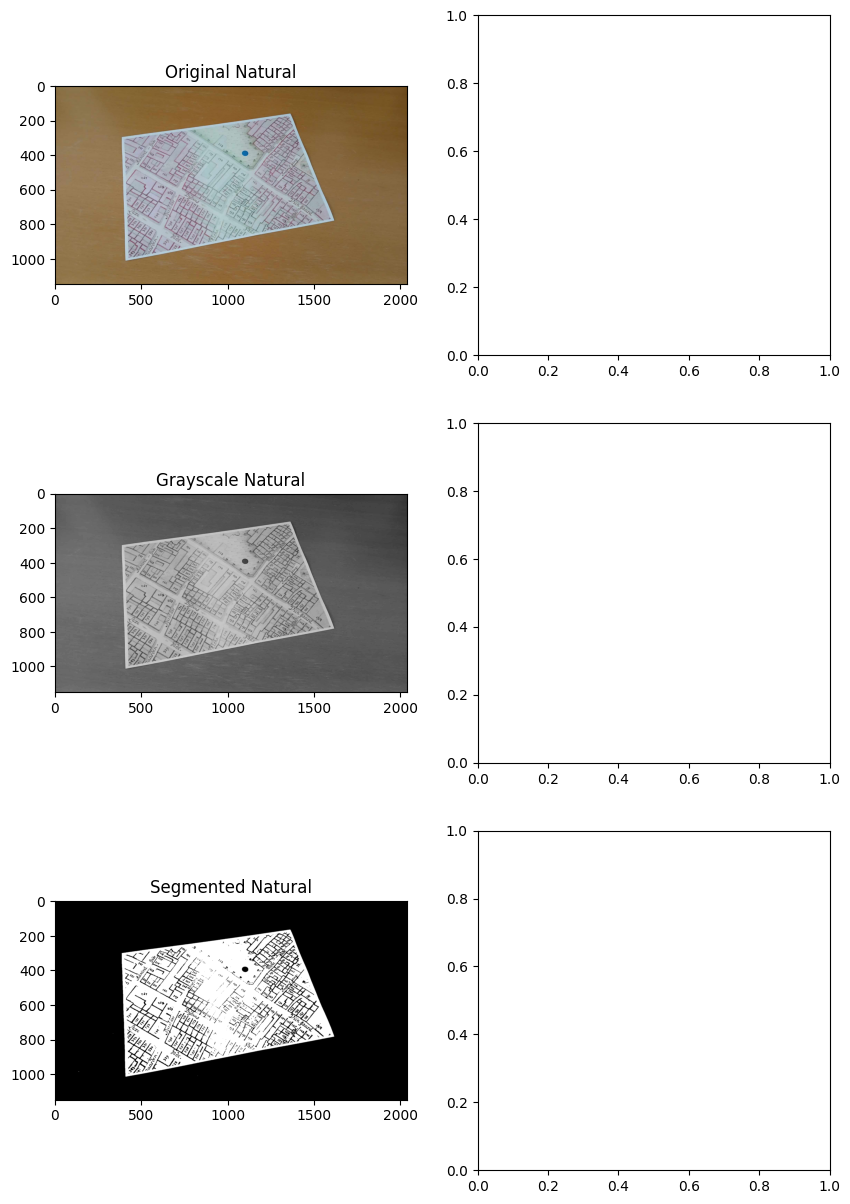

In [5]:
import matplotlib.pyplot as plt
from skimage import io, filters, color

# Load images
image_nat = io.imread('../TestImages/Week 7/matrikelnumre_nat.png')
# image_art = io.imread('../TestImages/Week 7/matrikelnumre_art.png')

# Convert to grayscale
gray_nat = color.rgb2gray(image_nat)
# gray_art = color.rgb2gray(image_art)

# Compute Otsu threshold
thresh_nat = filters.threshold_otsu(gray_nat)
# thresh_art = filters.threshold_otsu(gray_art)

# Apply threshold to obtain binary masks
binary_nat = gray_nat > thresh_nat
# binary_art = gray_art > thresh_art

# Plot results
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes[0, 0].imshow(image_nat)
axes[0, 0].set_title('Original Natural')
# axes[0, 1].imshow(image_art)
# axes[0, 1].set_title('Original Artificial')

axes[1, 0].imshow(gray_nat, cmap='gray')
# axes[1, 1].imshow(gray_art, cmap='gray')
axes[1, 0].set_title('Grayscale Natural')
# axes[1, 1].set_title('Grayscale Artificial')

axes[2, 0].imshow(binary_nat, cmap='gray')
# axes[2, 1].imshow(binary_art, cmap='gray')
axes[2, 0].set_title('Segmented Natural')
# axes[2, 1].set_title('Segmented Artificial')

plt.show()


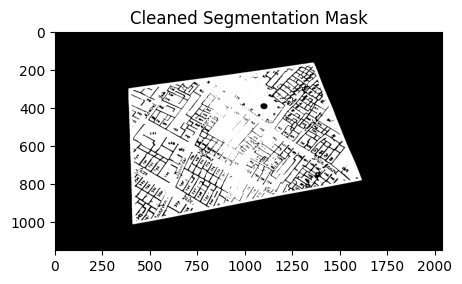

In [20]:
from skimage import morphology

# Define structuring element
selem = morphology.disk(2)

# Perform morphological opening to remove thin lines
cleaned_nat = morphology.opening(binary_nat, selem)

# Plot cleaned image
plt.figure(figsize=(5, 5))
plt.imshow(cleaned_nat, cmap='gray')
plt.title('Cleaned Segmentation Mask')
plt.show()

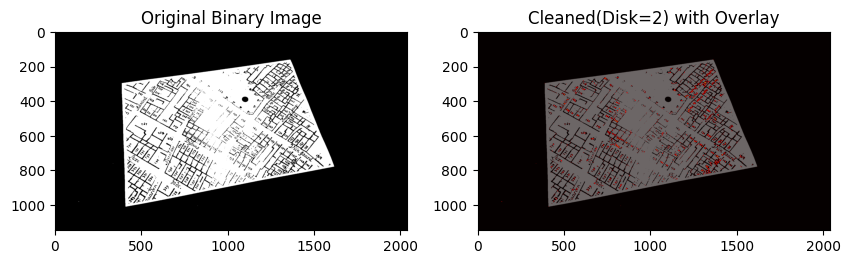

In [22]:
import numpy as np

# Overlay original binary image and cleaned result
overlay = np.logical_xor(binary_nat, cleaned_nat)  # Highlight changed pixels

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_nat, cmap='gray')
plt.title("Original Binary Image")

plt.subplot(1, 2, 2)
plt.imshow(cleaned_nat, cmap='gray')
plt.imshow(overlay, cmap='hot', alpha=0.6)  # Highlight changes in red
plt.title("Cleaned(Disk=2) with Overlay")

plt.show()

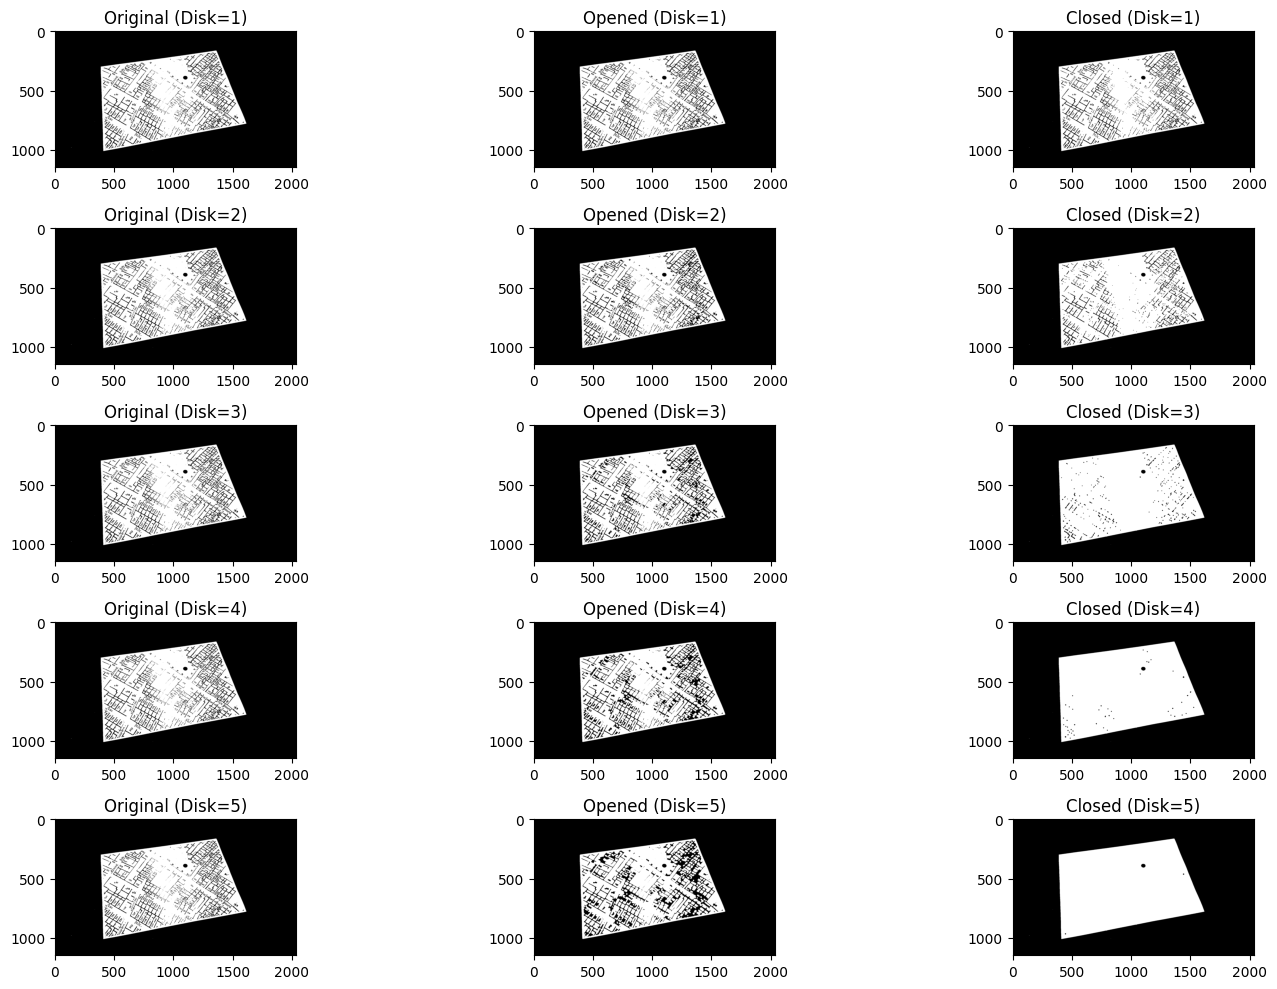

In [19]:
import matplotlib.pyplot as plt
from skimage import morphology

# Define different structuring element sizes
disk_sizes = [1, 2, 3, 4, 5]

fig, axes = plt.subplots(len(disk_sizes), 3, figsize=(15, 10))

for i, size in enumerate(disk_sizes):
    selem = morphology.disk(size)

    # Perform opening and closing
    opened = morphology.opening(binary_nat, selem)
    closed = morphology.closing(binary_nat, selem)

    # Plot original, opened, and closed images
    axes[i, 0].imshow(binary_nat, cmap='gray')
    axes[i, 0].set_title(f'Original (Disk={size})')

    axes[i, 1].imshow(opened, cmap='gray')
    axes[i, 1].set_title(f'Opened (Disk={size})')

    axes[i, 2].imshow(closed, cmap='gray')
    axes[i, 2].set_title(f'Closed (Disk={size})')

plt.tight_layout()
plt.show()
